# Material de aula - Redes Neurais e Deep Learning

In [1]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados


## <center> Perceptron Multicamadas e Classificação de Padrões - LABORATÓRIO 03 </center>

### A padronização para a saída, representando o conservante a ser aplicado, ficou definida da seguinte forma:

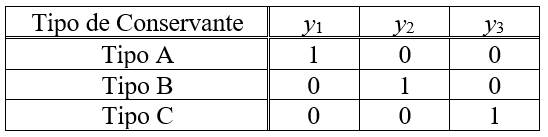

In [2]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [4]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''    
    return 1/(1+np.exp(-z))

In [5]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''        
    return np.tanh(z)

# 1 - Implementação do algoritmo de treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, complete o código para construir as funções de treinamento do MLP.

## 1.1 - Ajuste o código que realiza o forward step do MLP

In [6]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]

    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## COMPLETE O PASSO DE CALCULO DA SAIDA (UTILIZANDO FUNÇÃO SIGMOIDE, POIS AGORA SERÁ APLICADA A CLASSIFICAÇÃO DE PADRÕES)
    I_2 = W_2 @ Y_1 + B_2
    Y_2 = sigmoid(I_2) #Função sigmoide na camada oculta, g2
    #IMPLEMENTE O CÓDIGO AQUI - FIM
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [7]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2
    E_k = np.sum(E_k, axis=1)
    MSE = np.sum(E_k) / nSamples
    
    return np.asscalar(MSE)

## 1.2 - Ajuste o código que realiza o treinamento em BATCH

In [8]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       

        #INICIO - BACKWARD STEP
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA

        #A derivada de g2 é igual a Y_2 * (1 - Y_2)
        #Ajuste de pesos Camada Oculta - Camada de Saída
        diff_g2 = Y_2 * (1 - Y_2)
        #Gradiente local
        delta_2 = (vOutputs - Y_2) * diff_g2
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2
        W_2 += eta * delta_2 @ Y_1.T
        B_2 += eta * np.sum(delta_2, axis=1, keepdims=True) #Soma das colunas de delta_2. Podemos multiplicar por um vetor coluna de [1] também
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        diff_g1 = Y_1 * (1 - Y_1)

        #Gradiente local
        delta_1 = (W_2.T @ delta_2) * diff_g1
        
        #Ajuste dos pesos
        W_1 += eta * delta_1 @ Y_0.T
        B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.3 - Ajuste o código que realiza o treinamento ONLINE

In [9]:
#CÉLULA MLP-LIB-08
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples) :
            Y_0 = vInputs[:, [k]] #pega uma amostra de entrada
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])       

            #INICIO - BACKWARD STEP
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA

            #A derivada de g2 é igual a Y_2 * (1 - Y_2)
            #Ajuste de pesos Camada Oculta - Camada de Saída
            diff_g2 = Y_2 * (1 - Y_2)
            #Gradiente local
            Y_d = vOutputs[:, [k]] #pega uma amostra de saida
            delta_2 = (Y_d - Y_2) * diff_g2 
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            #AJUSTE OS VALORES DE W_2 E B_2
            W_2 += eta * delta_2 @ Y_1.T
            B_2 += eta * np.sum(delta_2, axis=1, keepdims=True) #Soma das colunas de delta_2. Podemos multiplicar por um vetor coluna de [1] também
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)

            #Gradiente local
            delta_1 = (W_2.T @ delta_2) * diff_g1

            #Ajuste dos pesos
            W_1 += eta * delta_1 @ Y_0.T
            B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
            #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

In [10]:
#CÉLULA MLP-LIB-09
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)    
    return (Y_2)

# 2 - Implementação e testes do modelo da Rede MLP

### No processamento de bebidas, a aplicação de um determinado conservante é efetuada em função da combinação de 04 variáveis reais, definidas por x1 (teor de água), x2 (grau de acidez), x3 (temperatura) e x4 (tensão superficial). 

### Sabe-se que existem apenas três tipos de conservantes que podem ser aplicados, os quais são categorizados por tipo A, B e C. A partir destas variáveis, realizam-se ensaios em laboratório para especificar que tipo de conservante deve ser aplicado em determinada bebida.

### Por intermédio de 148 desses ensaios experimentais, a equipe de engenheiros e cientistas resolveu aplicar uma rede perceptron multicamadas como classificadora de padrões, a fim de que esta identifique qual conservante será aplicado em determinado lote de bebida. Por questões operacionais da própria linha de produção, utilizar-se-á aqui uma rede perceptron com três saídas, conforme apresentado na figura abaixo.

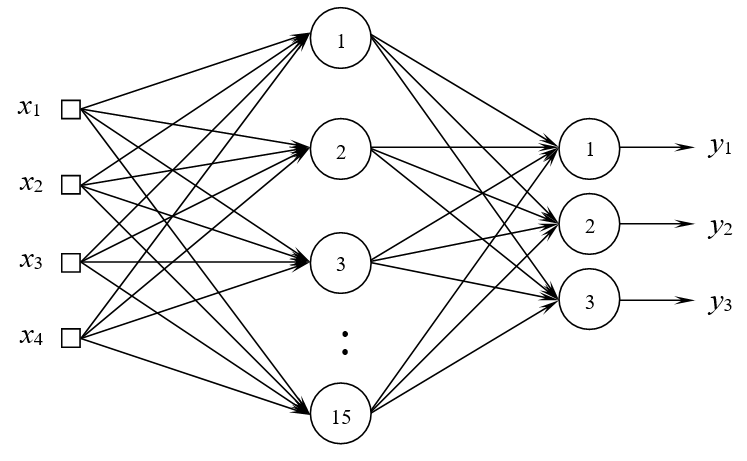


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

## MLP - inicio

# 2.1 - Configuração dos hiperparâmetros

In [11]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta = 0.01
epsilon = 0.00001
nInputs  = 4
nOutputs = 3
max_epochs = 10000
dictLayers = {'nLayers':2, 'vLayers':np.array([nInputs, 15, nOutputs])}

# 2.2 - Carga dos dados e execução do treinamento

In [12]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA

#Carrega dados - Treino
dfTrainingFile = loadDataFile('ds_wine_training.csv')
# dfTrainingFile.drop(columns=('Amostra'), inplace=True)

nSamples = len (dfTrainingFile['x1'])
vInputsTrain  = np.array(dfTrainingFile[['x1', 'x2', 'x3', 'x4']])
vOutputsTrain = np.array(dfTrainingFile[['d1', 'd2', 'd3']])
# print(vOutputs.shape)

(W_1, W_2, B_1, B_2, MSE) = mlp_train_batch(eta, epsilon, vInputsTrain.T, vOutputsTrain.T, dictLayers, max_epochs)

print(W_1)
print('-----')
print(W_2)

Epoch = 0 - MSE = 0.9966389862798783
Epoch = 1 - MSE = 0.9965768849173586
Epoch = 2 - MSE = 0.9965121659028033
Epoch = 3 - MSE = 0.9964446482221704
Epoch = 4 - MSE = 0.9963741331803371
Epoch = 5 - MSE = 0.9963004021541881
Epoch = 6 - MSE = 0.9962232139921438
Epoch = 7 - MSE = 0.9961423019934105
Epoch = 8 - MSE = 0.9960573703854628
Epoch = 9 - MSE = 0.9959680901997302
Epoch = 10 - MSE = 0.9958740944220388
Epoch = 11 - MSE = 0.9957749722646064
Epoch = 12 - MSE = 0.9956702623683414
Epoch = 13 - MSE = 0.9955594446952106
Epoch = 14 - MSE = 0.9954419308069191
Epoch = 15 - MSE = 0.9953170521431588
Epoch = 16 - MSE = 0.9951840458033818
Epoch = 17 - MSE = 0.9950420371908767
Epoch = 18 - MSE = 0.9948900186833527
Epoch = 19 - MSE = 0.994726823230951
Epoch = 20 - MSE = 0.9945510914226396
Epoch = 21 - MSE = 0.9943612300644815
Epoch = 22 - MSE = 0.9941553596175697
Epoch = 23 - MSE = 0.993931246858309
Epoch = 24 - MSE = 0.9936862177097083
Epoch = 25 - MSE = 0.9934170431329497
Epoch = 26 - MSE = 0.993

Epoch = 318 - MSE = 0.21554794596178237
Epoch = 319 - MSE = 0.21494823833745483
Epoch = 320 - MSE = 0.2143543925140184
Epoch = 321 - MSE = 0.2137663875130295
Epoch = 322 - MSE = 0.21318419946791586
Epoch = 323 - MSE = 0.21260780179915378
Epoch = 324 - MSE = 0.212037165384549
Epoch = 325 - MSE = 0.2114722587243883
Epoch = 326 - MSE = 0.21091304810127656
Epoch = 327 - MSE = 0.2103594977345193
Epoch = 328 - MSE = 0.20981156992895086
Epoch = 329 - MSE = 0.20926922521814537
Epoch = 330 - MSE = 0.20873242250198165
Epoch = 331 - MSE = 0.2082011191785621
Epoch = 332 - MSE = 0.20767527127051377
Epoch = 333 - MSE = 0.20715483354572217
Epoch = 334 - MSE = 0.20663975963257025
Epoch = 335 - MSE = 0.20613000212977176
Epoch = 336 - MSE = 0.20562551271090487
Epoch = 337 - MSE = 0.2051262422237642
Epoch = 338 - MSE = 0.20463214078466094
Epoch = 339 - MSE = 0.20414315786780887
Epoch = 340 - MSE = 0.2036592423899429
Epoch = 341 - MSE = 0.20318034279031985
Epoch = 342 - MSE = 0.202706407106258
Epoch = 343

Epoch = 647 - MSE = 0.1501560125724571
Epoch = 648 - MSE = 0.15008892278942706
Epoch = 649 - MSE = 0.15002200974866786
Epoch = 650 - MSE = 0.14995527115017881
Epoch = 651 - MSE = 0.14988870470286234
Epoch = 652 - MSE = 0.14982230812437894
Epoch = 653 - MSE = 0.1497560791410052
Epoch = 654 - MSE = 0.14969001548749444
Epoch = 655 - MSE = 0.14962411490693986
Epoch = 656 - MSE = 0.14955837515064066
Epoch = 657 - MSE = 0.14949279397797044
Epoch = 658 - MSE = 0.14942736915624882
Epoch = 659 - MSE = 0.14936209846061524
Epoch = 660 - MSE = 0.14929697967390568
Epoch = 661 - MSE = 0.1492320105865319
Epoch = 662 - MSE = 0.14916718899636372
Epoch = 663 - MSE = 0.14910251270861324
Epoch = 664 - MSE = 0.14903797953572248
Epoch = 665 - MSE = 0.14897358729725332
Epoch = 666 - MSE = 0.14890933381978008
Epoch = 667 - MSE = 0.1488452169367849
Epoch = 668 - MSE = 0.1487812344885555
Epoch = 669 - MSE = 0.14871738432208628
Epoch = 670 - MSE = 0.14865366429098106
Epoch = 671 - MSE = 0.14859007225535953
Epoch

Epoch = 1010 - MSE = 0.12448093790893494
Epoch = 1011 - MSE = 0.12438748153382949
Epoch = 1012 - MSE = 0.12429387321912844
Epoch = 1013 - MSE = 0.12420011310870432
Epoch = 1014 - MSE = 0.12410620135107643
Epoch = 1015 - MSE = 0.12401213809949437
Epoch = 1016 - MSE = 0.12391792351202091
Epoch = 1017 - MSE = 0.1238235577516151
Epoch = 1018 - MSE = 0.12372904098621465
Epoch = 1019 - MSE = 0.12363437338881823
Epoch = 1020 - MSE = 0.12353955513756766
Epoch = 1021 - MSE = 0.12344458641582912
Epoch = 1022 - MSE = 0.12334946741227444
Epoch = 1023 - MSE = 0.1232541983209617
Epoch = 1024 - MSE = 0.12315877934141549
Epoch = 1025 - MSE = 0.12306321067870632
Epoch = 1026 - MSE = 0.12296749254352979
Epoch = 1027 - MSE = 0.12287162515228497
Epoch = 1028 - MSE = 0.12277560872715214
Epoch = 1029 - MSE = 0.12267944349616991
Epoch = 1030 - MSE = 0.12258312969331152
Epoch = 1031 - MSE = 0.1224866675585605
Epoch = 1032 - MSE = 0.12239005733798551
Epoch = 1033 - MSE = 0.1222932992838142
Epoch = 1034 - MSE =

Epoch = 1341 - MSE = 0.08909483593879094
Epoch = 1342 - MSE = 0.08899146326797645
Epoch = 1343 - MSE = 0.08888820818049824
Epoch = 1344 - MSE = 0.08878507119843594
Epoch = 1345 - MSE = 0.08868205283868363
Epoch = 1346 - MSE = 0.0885791536129647
Epoch = 1347 - MSE = 0.08847637402784705
Epoch = 1348 - MSE = 0.08837371458475848
Epoch = 1349 - MSE = 0.08827117578000222
Epoch = 1350 - MSE = 0.08816875810477279
Epoch = 1351 - MSE = 0.088066462045172
Epoch = 1352 - MSE = 0.08796428808222521
Epoch = 1353 - MSE = 0.08786223669189758
Epoch = 1354 - MSE = 0.08776030834511092
Epoch = 1355 - MSE = 0.08765850350776022
Epoch = 1356 - MSE = 0.08755682264073088
Epoch = 1357 - MSE = 0.08745526619991563
Epoch = 1358 - MSE = 0.08735383463623198
Epoch = 1359 - MSE = 0.08725252839563959
Epoch = 1360 - MSE = 0.08715134791915809
Epoch = 1361 - MSE = 0.0870502936428847
Epoch = 1362 - MSE = 0.08694936599801227
Epoch = 1363 - MSE = 0.08684856541084734
Epoch = 1364 - MSE = 0.08674789230282856
Epoch = 1365 - MSE =

Epoch = 1655 - MSE = 0.06349247778955149
Epoch = 1656 - MSE = 0.06343276945595105
Epoch = 1657 - MSE = 0.06337318418764533
Epoch = 1658 - MSE = 0.06331372176587645
Epoch = 1659 - MSE = 0.06325438197162765
Epoch = 1660 - MSE = 0.06319516458563008
Epoch = 1661 - MSE = 0.06313606938836953
Epoch = 1662 - MSE = 0.0630770961600933
Epoch = 1663 - MSE = 0.06301824468081667
Epoch = 1664 - MSE = 0.06295951473032965
Epoch = 1665 - MSE = 0.06290090608820355
Epoch = 1666 - MSE = 0.06284241853379745
Epoch = 1667 - MSE = 0.06278405184626469
Epoch = 1668 - MSE = 0.0627258058045593
Epoch = 1669 - MSE = 0.06266768018744232
Epoch = 1670 - MSE = 0.06260967477348818
Epoch = 1671 - MSE = 0.06255178934109087
Epoch = 1672 - MSE = 0.06249402366847027
Epoch = 1673 - MSE = 0.062436377533678256
Epoch = 1674 - MSE = 0.06237885071460477
Epoch = 1675 - MSE = 0.06232144298898397
Epoch = 1676 - MSE = 0.062264154134400215
Epoch = 1677 - MSE = 0.062206983928294005
Epoch = 1678 - MSE = 0.06214993214796797
Epoch = 1679 - 

Epoch = 1998 - MSE = 0.04879774719359801
Epoch = 1999 - MSE = 0.04876802719744743
Epoch = 2000 - MSE = 0.04873836419181071
Epoch = 2001 - MSE = 0.048708758039263146
Epoch = 2002 - MSE = 0.048679208602719924
Epoch = 2003 - MSE = 0.048649715745435876
Epoch = 2004 - MSE = 0.048620279331004705
Epoch = 2005 - MSE = 0.04859089922335871
Epoch = 2006 - MSE = 0.048561575286768036
Epoch = 2007 - MSE = 0.048532307385840336
Epoch = 2008 - MSE = 0.04850309538552011
Epoch = 2009 - MSE = 0.04847393915108822
Epoch = 2010 - MSE = 0.04844483854816137
Epoch = 2011 - MSE = 0.04841579344269161
Epoch = 2012 - MSE = 0.04838680370096565
Epoch = 2013 - MSE = 0.04835786918960448
Epoch = 2014 - MSE = 0.04832898977556277
Epoch = 2015 - MSE = 0.048300165326128235
Epoch = 2016 - MSE = 0.04827139570892128
Epoch = 2017 - MSE = 0.04824268079189422
Epoch = 2018 - MSE = 0.04821402044333089
Epoch = 2019 - MSE = 0.048185414531846084
Epoch = 2020 - MSE = 0.04815686292638485
Epoch = 2021 - MSE = 0.048128365496222125
Epoch =

Epoch = 2359 - MSE = 0.04091061228543494
Epoch = 2360 - MSE = 0.04089476476230451
Epoch = 2361 - MSE = 0.040878942070480255
Epoch = 2362 - MSE = 0.040863144156952656
Epoch = 2363 - MSE = 0.04084737096885103
Epoch = 2364 - MSE = 0.04083162245344324
Epoch = 2365 - MSE = 0.0408158985581353
Epoch = 2366 - MSE = 0.04080019923047088
Epoch = 2367 - MSE = 0.04078452441813102
Epoch = 2368 - MSE = 0.04076887406893362
Epoch = 2369 - MSE = 0.040753248130833176
Epoch = 2370 - MSE = 0.04073764655192031
Epoch = 2371 - MSE = 0.040722069280421325
Epoch = 2372 - MSE = 0.04070651626469797
Epoch = 2373 - MSE = 0.04069098745324684
Epoch = 2374 - MSE = 0.040675482794699194
Epoch = 2375 - MSE = 0.0406600022378204
Epoch = 2376 - MSE = 0.040644545731509704
Epoch = 2377 - MSE = 0.04062911322479964
Epoch = 2378 - MSE = 0.040613704666855856
Epoch = 2379 - MSE = 0.0405983200069766
Epoch = 2380 - MSE = 0.040582959194592365
Epoch = 2381 - MSE = 0.04056762217926554
Epoch = 2382 - MSE = 0.04055230891068997
Epoch = 238

# 2.3 - Verificação dos resultados do treinamento

Dado que o problema se configura como um típico processo de classificação de padrões, implemente a rotina que faz o pós-processamento das saídas fornecidas pela rede (números reais) para números inteiros. Utilize o critério do arredondamento simétrico, isto é:

$ y_i^{pos} = 1$ se $y_i \geq 0.5 $

$ y_i^{pos} = 0$ se $y_i < 0.5 $

utilizado apenas no pós-processamento do conjunto de teste. 

In [14]:
#Verifica resultados
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
y_pred = mlp_operation(vInputsTrain.T, [W_1, W_2], [B_1, B_2])

#Pos-processamento
y_pred[y_pred >= 0.5] = 1.0
y_pred[y_pred <  0.5] = 0.0

y_pred = y_pred.astype(int)

results = vOutputsTrain == y_pred.T

#Verifica quantos 'True' ocorrem em cada linha. Uma predição correta tem que ser igual a 3 (3 True)
results2 = np.sum(results, axis=1)
results2 = results2 == 3
accuracy = sum(results2) / len(results2) * 100
print('Taxa de acerto do conjunto de treinamento: {}%'.format(accuracy))

Taxa de acerto do conjunto de treinamento: 95.38461538461539%


[[3.88210380e-05 9.97937702e-01 4.15601868e-05 2.33061409e-02
  1.92731161e-04 9.22056303e-01 8.02408885e-03 3.60283014e-03
  9.66007625e-01 9.90165707e-01 3.00744318e-03 9.77021466e-01
  2.68919376e-05 3.60200940e-05 2.25275248e-05 9.87078423e-01
  2.81809223e-04 6.10651619e-03]
 [5.27458522e-02 1.76057768e-02 5.82471479e-02 8.57972426e-01
  2.66530415e-01 1.49255787e-01 8.67875664e-01 8.40717696e-01
  1.08599482e-01 3.55868570e-02 8.15302127e-01 6.11090255e-02
  3.69727199e-02 5.05807885e-02 2.96489695e-02 6.33192275e-02
  2.97279200e-01 8.33281109e-01]
 [9.76349706e-01 7.05321563e-07 9.73619022e-01 9.32041044e-03
  8.15196032e-01 2.31806598e-05 3.09068663e-02 7.76563216e-02
  9.78352429e-06 3.16331020e-06 9.45362830e-02 7.23396349e-06
  9.85734372e-01 9.79038670e-01 9.88971618e-01 4.00483378e-06
  7.27570382e-01 4.38913813e-02]]
---
[[0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0]]
Taxa de acerto do conjunto de test

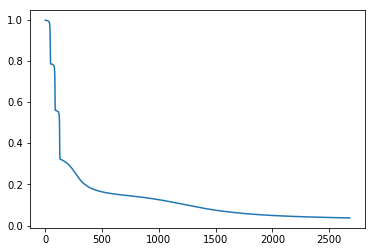

In [15]:
#Carrega dados - Teste
dfTestFile = loadDataFile('ds_wine_operation.csv')
nSamples = len (dfTestFile['x1'])

vInputsTest  = np.array(dfTestFile[['x1', 'x2', 'x3', 'x4']])
vOutputsTest = np.array(dfTestFile[['d1', 'd2', 'd3']])

y_pred = mlp_operation(vInputsTest.T, [W_1, W_2], [B_1, B_2])

print(y_pred)
print('---')
print(vOutputsTest.T)

#Pos-processamento
y_pred[y_pred >= 0.5] = 1.0
y_pred[y_pred <  0.5] = 0.0

y_pred = y_pred.astype(int)

results = vOutputsTest == y_pred.T

#Verifica quantos 'True' ocorrem em cada linha. Uma predição correta tem que ser igual a 3 (3 True)
results2 = np.sum(results, axis=1)
results2 = results2 == 3
accuracy = sum(results2) / len(results2) * 100
print('Taxa de acerto do conjunto de teste: {}%'.format(accuracy))

#Erro Quadratico Medio
plt.figure()
plt.plot(range(len(MSE)-1), MSE[1:])